<img src=http://www.acofi.edu.co/eiei2016/wp-content/uploads/2016/09/Logo-Universidad-ICESI.jpg width="300" height="200" align="center">

# Matemáticas Aplicadas II

## Departamento de Ciencias Físicas y Aplicadas / Facultad de Ingeniería, Diseño y Ciencias Aplicadas

## Profesor Luis Fernando Azcárate Mesa

## **Notebook 1: Integración Numérica**

## David Dulce

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact
from ipywidgets.widgets import IntSlider as slider

# Sumas de Riemann

## Concepto General

En general dada una partición $a=x_0 < x_1 \cdots < x_n=b$ del intervalo $[a,b]$ escogemos etiquetas $c_{i} \in [x_{i-1},x_{i}]$ en cada subintervalo, tomamos $\Delta_i = x_{i+1} -x_i$ y así, la suma de Riemann de la función $f$ asociada a esta partición se define como:

$$ f(c_1)(x_1-x_0)+ \cdots +f(c_n)(x_n-x_{n-1})=\sum_{i=1}^{n} f(c_i)\Delta_i $$

Decimos que una partición es regular si los puntos $x_i$ esta igualmente espaciados, en este caso tenemos que la longitud de los subintervalos es $\Delta_i = \frac{b-a}{n}$.

## Sumas por izquierda y derecha

Para una partición regular podemos tomar los puntos $c_i$ como los extremos izquierdos del intervalo $[x_{i-1},x_{i}]$ en este caso $c_1=x_0,c_2=x_1 \cdots c_i=x_{i-1} \cdots c_n=x_{n-1}$ donde
$i=0 \cdots i=n-1$, llamamos a la suma correspondiente  __*suma de Riemann por la izquierda*__ $S_I$

$$S_{I}=f(x_0)(x_1-x_0)+ \cdots +f(x_{n-1})(x_n-x_{n-1})=\Delta \ \sum_{i=0}^{n-1} f(x_i)$$ donde $\Delta=\frac{b-a}{n}$.

Si tomamos el extremo derecho $c_1=x_1,c_2=x_2 \cdots c_i=x_i \cdots c_n=x_n$ hablamos de __*suma de Riemann por la derecha*__ $S_D$
 $$S_{D}=f(x_1)(x_1-x_0)+ \cdots +f(x_{n})(x_n-x_{n-1})=\Delta \ \sum_{i=1}^{n} f(x_i)$$

### <Font color="Red"> Ejemplo 1

En el siguiente código se muestra el uso de la función `linspace` para particionar el intervalo $[1,3]$ en 4 y 5 subintervalos iguales.

In [ ]:
part1 = np.linspace(1, 3, 5) # partition 4 subintervals (5 points)
part2 = np.linspace(1, 3, 6) # partition 5 subintervals (6 points)

print(part1)
print(part2)

[1.  1.5 2.  2.5 3. ]
[1.  1.4 1.8 2.2 2.6 3. ]


## Método de Sumas izquierdas

Ahora realizaremos la implementación de un código que nos permita calcular las sumas por izquierda para una función $f$ en un intervalo $[a,b]$, para una partición en $n$ subintervalos.


In [ ]:
# left sum of f over [a, b] with n subintervals

# my code
def riemann_left(f, a, b, n=100):
  h = (b - a) / n
  sum = 0
  for i in range(n):
    sum += f(a + i * h)
  return sum * h

# teacher's code
def left_sum(f, a, b, n=100):
  part_x = np.linspace(a, b, n+1)[:-1] # partición del intervalo [a,b] con extremos izquierdos
  part_y = [f(c) for c in part_x] # evaluamos la función en los puntos característicos
  h = (b - a) / n # ancho de cada subintervalo
  return h * np.sum(part_y)

### <Font color="Red"> Ejemplo 2

Aproximemos la integral de la función $f(x)=x^2$ en el intervalo $[0,1]$ usando sumas izquierdas.

In [ ]:
sqrd = lambda x: x**2
a = 0
b = 1
n = 100000
print(left_sum(sqrd, a, b, n))
print(riemann_left(sqrd, a, b, n))

0.33332833335000006
0.3333283333499996


### Graficando rectángulos característicos

Se pueden utilizar algunas funciones de python para graficar las funciones, en el intervalo dado, y mostrar los rectángulos característicos para la sumas izquierdas. Esto lo podemos hacer con el siguiente código:

0.30074074074074075

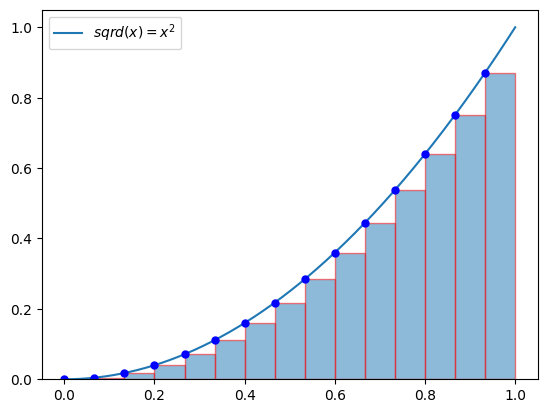

In [ ]:
x = np.linspace(0, 1, 1000)
y = sqrd(x)
plt.plot(x, y)

# graficamos las barras para n subintervalos
a, b, n = 0, 1, 6
n = 15 #@param {type:"slider", min:1, max:100, step:1}
x1 = np.linspace(a, b, n+1)[:-1]
y1 = sqrd(x1)
h = (b - a) / n

plt.legend(['$sqrd(x) = x^2$']) # graph title
plt.bar(x1, y1, width=h, align='edge', edgecolor='r', alpha=0.5) # bar chart
plt.plot(x1, y1, 'b.', markersize=10) # graph points sqrd(h_i)

left_sum(sqrd, 0, 1, n)

## Método de Sumas Derechas

Esta sección es una implementación similar a la anterior de las sumas de Riemann por la derecha.

In [ ]:
# my code
def riemann_right(f, a, b, n=100):
  h = (b - a) / n
  sum = 0
  for i in range(1, n + 1):
    sum += f(a + i * h)
  return sum * h

# teacher's code
def right_sum(f, a, b, n=100):
  part_x = np.linspace(a, b, n+1)[1:]
  part_y = [f(c) for c in part_x]
  h = (b - a) / n
  return h * np.sum(part_y)

### <Font color="Red"> Ejemplo 3.  

Probemos la implementación de sumas derechas para la función  $f(x)=x^2$ en el intervalo $[0,1]$

In [ ]:
right_sum(sqrd, 0, 1)
riemann_right(sqrd, 0, 1)

0.33835000000000004

## Método de Punto Medio

Con el método del Punto Medio estimamos áreas de regiones bajo curvas utilizando rectángulos y, en cierto sentido, usamos funciones constantes a trozos para realizar dicha aproximación.

In [ ]:
def riemann(f, a, b, n=100):
  h = (b - a) / n
  sum = 0
  for i in range(n):
    xi = a + (i - 0.5) * h
    sum += f(xi)
  return sum * h

In [ ]:
riemann(sqrd, 0, 1)

0.32342499999999996

# Método del Trapecio

El método del trapecio consiste en aproximar la integral de la función $f$ en el intervalo $[a,b]$ usando el promedio de las sumas de Riemann por izquierda y derecha. Más adelante hablaremos de la estimación del error y una implementación más eficiente, de momento implementaremos este método de forma sencilla promediando las funciones anteriores.

In [ ]:
def trapezoidal_avg(f, a, b, n=100):
  sum = left_sum(f, a, b, n) + right_sum(f, a, b, n)
  return sum * 0.5

## Ejercicio

Use el método del trapecio, como promedio de sumas izquierdas y derechas, para aproximar el valor de la siguiente integral:

$$\int_{0}^{1} e^{-x^2} \ dx$$

In [ ]:
# Answer

ex2 = lambda x: np.exp(-x**2)

trapezoidal_avg(ex2, 0, 1, 100000)

0.7468241328062959

## Implementación Optimizada

In [ ]:
# teacher's code
def trapezoidal(f, a, b, n=100):
  x = np.linspace(a, b, n+1) # n+1 points make n subintervals
  y = f(x)
  y_right = y[1:] # right endpoints
  y_left = y[:-1] # left endpoints
  dx = (b - a) / n
  T = (dx/2) * np.sum(y_right + y_left)
  return T

# my code
def my_trapezoidal(f, a, b, n=100):
  h = (b - a) / n
  sum = 0.5 * (f(a) + f(b))
  for i in range(1, n):
    sum += f(a + i * h)
  return sum * h

### <Font color="Red"> Ejemplo 4

Probemos la implementación del método del trapecio para la función  $f(x)=x^2$  en el intervalo  $[0,1]$.

In [ ]:
sqrd = lambda x: x**2

print(trapezoidal(sqrd, 0, 1))
print(my_trapezoidal(sqrd, 0, 1))

0.3333499999999999
0.33335000000000004


# Simpson

Con el Método del trapecio utilizamos funciones lineales a trozos que determinan trapecios. En el Método de Simpson utilizamos funciones cuadráticas a trozos. Veamos la implementación a continuación:

In [ ]:
# my code
def my_simpson(f, a, b, n=100):
  h = (b - a) / n
  sum = f(a) + f(b)
  for i in range(1, n, 2):
    sum += 4 * f(a + i * h)
  for i in range(2, n - 1, 2):
    sum += 2 * f(a + i * h)
  return sum * h / 3

# teacher's code
def simpson(f, a, b, n=100):
    dx = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x)
    sum = dx/3 * np.sum(y[0:-1:2] + 4*y[1::2] + y[2::2])
    return sum

## Ejemplo 5

Probemos la implementación del método de Simpson para la función  $f(x)=x^2$  en el intervalo  $[0,1]$.

In [ ]:
print(my_simpson(sqrd, 0, 1))
print(simpson(sqrd, 0, 1))

0.3333333333333334
0.33333333333333337


# Testing


In [ ]:
import numpy as np
import sympy as sp

x = sp.symbols('x')

Algunas de estas integrales fueron tomadas del MIT [aquí](https://math.mit.edu/~yyao1/pdf/qualifying_round_2023_test.pdf) y [aquí](https://math.mit.edu/~yyao1/pdf/2023_finals.pdf).


1. $$ \int_\frac {1}{2}^3 e^{x} \, dx = e^3 - \sqrt e $$

In [ ]:
int1 = lambda x: np.e**x
expr1 = sp.exp(x)
result1 = sp.integrate(expr1, (x, 1/2, 3)).evalf()
print(result1)
trapezoidal(int1, 1/2, 3, 1000)

18.4368156524875


18.43682525499469

2. $$ \int_{-2024}^{2024} \sin^6 x + \cos^6 x + 3\sin^2(x) \cos^2(x) \, dx $$

In [ ]:
int2 = lambda x: np.sin(x)**6 + np.cos(x)**6 + 3 * ( np.sin(x)**2 * np.cos(x)**2 )
expr2 = sp.sin(x)**6 + sp.cos(x)**6 + 3 * sp.sin(x)**2 * sp.cos(x)**2
result2 = sp.integrate(expr2, (x, -2024, 2024)).evalf()
print(result2)
riemann(int2, -2024, 2024, 100000)

4048.00000000000


4048.0

3. $$ \int_0^1 x^2 + \sqrt \frac {2x}{x + 1} \, dx $$

In [ ]:
int3 = lambda x: x**2 + ((2*x) / (x + 1))**0.5
expr3 = x**2 + sp.sqrt(2 * x / (x + 1))
result3 = sp.integrate(expr3, (x, 0, 1)).evalf()
print(result3)
simpson(int3, 0, 1, 1000)

1.08688285305287


1.0868792220511838

4. $$ \int_0^{\frac {\pi}{2}} \frac {\sqrt[3]{\tan x}}{(\sin x + \cos x)^2} \, dx = \frac {2 \sqrt {3} \pi}{9} $$

In [ ]:
int4 = lambda x: (np.tan(x)**1/3) / ((np.sin(x) + np.cos(x))**2)
expr4 = sp.sqrt(sp.tan(x)) / (sp.sin(x) + sp.cos(x))**2
result4 = sp.integrate(expr4, (x, 0, sp.pi/2)).evalf()
print(result4)
trapezoidal(int4, 0, np.pi/2, 1000)


1.57079632679490


4275508464669.9365

# Workshop

## <Font color="DodgerBlue"> Problema 1
 Un objeto que se mueve a lo largo de una línea recta tiene como función velocidad a $v(t) = sen \, t$. Si el objeto inicia en la posición cero, determine la distancia total recorrida y la posición del objeto en el tiempo $t=\frac{3\pi }{2}$. Nota: Tenga presente el signo de la integral en el intervalo $[0,\frac{3\pi }{2}]$ y use integración numérica para valores de $n=10,20,50,100$ que le permitan realizar una buen estimación de los valores solicitados. Organice la información en tablas y grafique la función posición para dicho intervalo.

### Datos

- $ v(t) = sen \, t $
- $ v_0 = 0 $

### Objetivos

Hallar
- Distancia total recorrida ($x$)
- Posición del objeto ($\vec x$)

cuando $ t = \frac {3 \pi}{2} $

### Hallar distancia total recorrida

In [ ]:
v = lambda t: np.sin(t)
v0 = 0
t_goal = 3 / 2 * np.pi
nvalues = [10, 20, 50, 100, 1000, 10**6, 10**8]

In [ ]:
# Integrar numericamente v(t) en el intervalo [0, 3pi/2] para hallar la distancia totoal recorrida

for n in nvalues:
  print(trapezoidal(v, 0, t_goal, n))

0.9814256368286486
0.9953693365978915
0.9992596700615098
0.9998149380680411
0.9999981494484902
0.9999999999981495
1.0000000000000056


Podemos concluir que la distancia recorrida cuando $ t = \frac {3 \pi}{2} $ es $ x = 1 m$, suponiendo que las medidas están en metros y segundos.

### Hallar posición

Integrando la función velocidad hallamos que

$$ x(t) = - cos\,t + C $$

como sabemos que parte del reposo podemos decir que

$$ x(t) = - cos\,t + 0 $$

$$ x(t) = - cos\,t $$

In [ ]:
x = lambda t: -np.sin(t)

x(t_goal)

1.0

Se corroboran los resultados del punto anterior, la distancia y la posición son iguales ya que el objeto parte del reposo. Tanto analíticamente como numéricamente nos da que

$$ x = \vec x = 1 $$

### Resultados

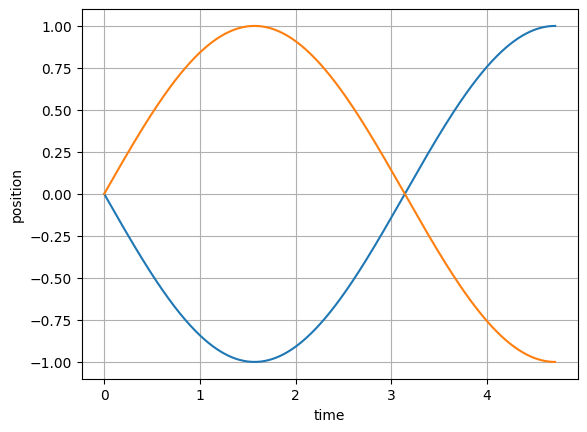

In [ ]:
# curves
t = np.linspace(0, t_goal, 1000)
x_func = x(t)
v_func = v(t)
plt.plot(t, x_func)
plt.plot(t, v_func)
plt.xlabel("time")
plt.ylabel("position")
plt.grid()


| t | x(t) | v(t) |
| --- | --- | --- |
| 0   | - | - |
| $\frac {\pi}{2}$ | - | - |
| $\pi$ | - | - |
| $\frac {3 \pi}{2}$ | - | - |

## <Font color="DodgerBlue"> Problema 2

Usen integración numérica para calcular las integrales siguientes $\int_{0}^{2}(x^2-2x)dx$  y  $\int_{0}^{3}(x^2-2x)dx$ e interpreten el resultado de cada una en término de áeas. Dibujen la función para cada intervalo de integración y usen dichas gráficas para sustentar sus resultados numéricos.

Hallemos la integral de $x^2 - 2x$:

$$ \int x^2 - 2x \, dx $$

$$ \int x^2 \, dx - \int 2x \, dx $$

$$ \frac {x^3}{3} - x^2 $$

Ahora podemos evaluar en $[0, 2]$ y [0, 3]

$$ \int_{0}^{2} x^2-2x \, dx $$

$$ \frac {x^3}{3} - x^2 \delta $$

In [ ]:
f = lambda x: x**2 - 2*x

print(riemann(f, 0, 2))

-1.3325999999999993


In [ ]:
print(riemann(f, 0, 3))

-0.08752499999999931


## <Font color="DodgerBlue"> Problema 3

Calcular $\int_{0}^{1}f(x)dx$ para una función desconocida $f(x)$ de la cual se conocen algunos valores indicados en la siguiente tabla:

<Font color="white">

| x             | f(x)   |  |  |
|-------------------|-------------|---------------|--------------|
| 0.0  | 1.0    |              |         |
| 0.25        |0.8   |              |         |
| 0.5 | 1.3 |             |         |
| 0.75        | 1.1  |            |          |
|1.0  |  1.6 |

Text(0.5, 1.0, 'f(x)')

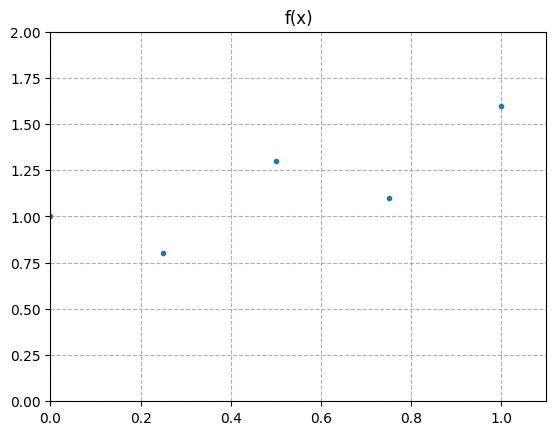

In [ ]:
import scipy as sc

x = [0, 0.25, 0.5, 0.75, 1]
y = [1, 0.8, 1.3, 1.1, 1.6]

plt.plot(x, y, '.')
plt.grid(linestyle='--')
plt.xlim(0, 1.1)
plt.ylim(0, 2)
plt.title('f(x)')
sc.interpolate()

In [ ]:
from IPython import IFrame
from IPython import display_html as print_iframe

# @title graph
graph = IFrame(
    src='https://www.geogebra.org/calculator/vmtdahhz',
    width='1020px',
    height='480px'
)
IP.display_html(graph)

ImportError: cannot import name 'IFrame' from 'IPython' (/usr/local/lib/python3.10/dist-packages/IPython/__init__.py)

##<Font color="DodgerBlue"> Problema 4

Consideren la siguiente integral definida:

$$\int_{3}^{6}\sqrt{9-(x-3)^{2}}dx$$   

Usen un argumento numérico y otro geométrico para encontrar el valor de la integral.

# Ecuaciones diferenciales

Ecuación: $ y' = y + 2 e^{-x} $

Solución: $ y = e^{x} - e^{-x} $

$ y = e^{x} - e^{-x} $

$ y' = e^{x} + e^{-x} $

$$ e^{x} + e^{-x} = e^{x} - e^{-x} + 2 e^{-x} $$

$$ e^{-x} + e^{-x} = 2 e^{-x} $$

$$ 2 e^{-x} = 2 e^{-x} $$

En efecto es solución de la ecuación

Ecuacion: $ y'' + 4y' + 4y = 0 $

Solucion:
- $ y_1 = e^{-2x} $
- $ y_2 = xe^{-2x} $

$ y'_1 = -2e^{-2x} $

$ y''_1 = 4e^{-2x} $

Probamos $y_1$

$$ 4e^{-2x} + 4 (-2e^{-2x}) + 4 (e^{-2x}) = 0 $$

$$ 8e^{-2x} = 8e^{-2x} $$

$ y'_2 = \frac {1 - 2x} {e^{2x}} $

$ y''_2 = \frac {-4 + 4x} {e^{2x}} $ -> factoriza euler y saca el reciproco

$$ \frac {-4 + 4x} {e^{2x}} + 4 ( \frac {1 - 2x} {e^{2x}} ) + 4 ( e^{-2x} ) = 0 $$